# Use Linear Regression to predict the Square of a Number **without** Using LinearRegression() from Scikit-Learn

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Defining Functions

The fit() function takes the x-training and y-training data to find the value for slope(m) and y-intercept(c) for which the Mean Square Error will be minimum. 

In [2]:
def fit(x,y):
    m=((x*y).mean()-(x.mean()*y.mean()))/((x*x).mean()-(x.mean()*x.mean()))
    c=y.mean()-m*(x.mean())
    return m,c

Formulas for m & c calculated by differentiaing Mean Square Error formula by m and then by c,equating by 0 and substituting 2nd equation in first.

The predict() function will take the x-testing data as input and return the predicted y values

In [16]:
def predict(x,m,c):
    y=m*x+c
    return y

The score() will determine the **coefficient of determination** for our prediction model which help us determine how well it is performing.


In [17]:
def score(xtest,ytest,m,c):
    ypred=predict(xtest,m,c)
    u=((ytest-ypred)**2).sum()
    v=((ytest-ytest.mean())**2).sum()
    score=1-(u/v)
    return score

The cost function simply tells us the **sum of squares** error for our prediction model.

In [18]:
def cost(x,ytrue,m,c):
    ypred=predict(x,m,c)
    return ((ytrue-ypred)**2).sum()

We'll take a random input of size 100.

In [6]:
x=np.random.randint(0,high=100,size=(100,1))
y=x**2

In [7]:
x.shape

(100, 1)

In [8]:
y.shape

(100, 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [20]:
m,c=fit(xtrain,ytrain)

In [21]:
ypred=predict(xtest,m,c)

#### Evaluating Our Model

In [22]:
score(xtest,ytest,m,c)

0.9294679412089659

In [23]:
cost(xtrain,ytrain,m,c)

39400220.67551658

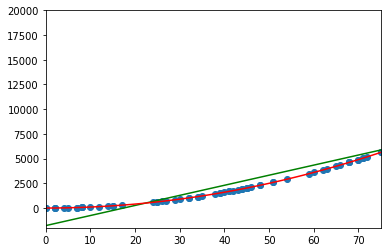

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.axis([0,75,-2000,20000])
plt.scatter(x=x,y=y)
xline=np.arange(0,len(y)+1,1)
yline=m*xline+c
plt.plot(xline,yline,color='green')
plt.plot(xline**2,color='red')